# 1. Environment Setup & Library Imports 🛠️

In [1]:
import numpy as np # Linear algebre
import pandas as pd # Data processing
import matplotlib.pyplot as plt # Visualization library
import seaborn as sns # Statistical data visualization
import os # Operationg system interfaces
import warnings # Warning control

# Configuration
warnings.filterwarnings("ignore") # Ignore warnings for cleaner output 
pd.set_option("display.max_columns", None) # Show all columns in DataFrames
pd.set_option("Display.width", 1000) # Set display width

# Set visualization style
sns.set_style("whitegrid")

# Check available files in the input directory
print("📂 Files in input directory:")
for dirname, _, filenames in os.walk("../data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

📂 Files in input directory:
../data\ts-forecasting.zip
../data\ts-forecasting\test.parquet
../data\ts-forecasting\train.parquet


## 🔎 Insight 1

**File Structure:** As anticipated, the train.parquet and test.parquet files are available.

**Format:** The Parquet format is optimized for large datasets (approximately 1GB in this competition). It preserves data types (int, float, category), which saves us the effort of performing manual type conversions every time we load the data.

# 2. Loading Data & Structural Overview 💾

In [5]:
# Define file paths
TRAIN_PATH = '../data/ts-forecasting/train.parquet'
TEST_PATH = '../data/ts-forecasting/test.parquet'

# Load datasets using pandas read_parquet
print("Loading training data...")
train_df = pd.read_parquet(TRAIN_PATH)

print("Loading test data...")
test_df = pd.read_parquet(TEST_PATH)

# Display dataset shapes to understand the scale
print(f"Trian Shape: {train_df.shape}")
print(f"Test spahe: {test_df.shape}")

# Display basic information about columns and memory usage
print("\n --- Train Info ---")
train_df.info()

# Display the first 5 rows of the training set
print("\n--- First 5 Rows of Train Data ---")
display(train_df.head())

Loading training data...
Loading test data...
Trian Shape: (5337414, 94)
Test spahe: (1447107, 92)

 --- Train Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5337414 entries, 0 to 5337413
Data columns (total 94 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   code          object 
 2   sub_code      object 
 3   sub_category  object 
 4   horizon       int32  
 5   ts_index      int32  
 6   feature_a     int32  
 7   feature_b     float64
 8   feature_c     float64
 9   feature_d     float64
 10  feature_e     float64
 11  feature_f     float64
 12  feature_g     float64
 13  feature_h     float64
 14  feature_i     float64
 15  feature_j     float64
 16  feature_k     float64
 17  feature_l     float64
 18  feature_m     float64
 19  feature_n     float64
 20  feature_o     float64
 21  feature_p     float64
 22  feature_q     float64
 23  feature_r     float64
 24  feature_s     float64
 25  feature_t     float64
 26  featur

,id,code,sub_code,sub_category,horizon,ts_index,feature_a,feature_b,feature_c,feature_d,feature_e,feature_f,feature_g,feature_h,feature_i,feature_j,feature_k,feature_l,feature_m,feature_n,feature_o,feature_p,feature_q,feature_r,feature_s,feature_t,feature_u,feature_v,feature_w,feature_x,feature_y,feature_z,feature_aa,feature_ab,feature_ac,feature_ad,feature_ae,feature_af,feature_ag,feature_ah,feature_ai,feature_aj,feature_ak,feature_al,feature_am,feature_an,feature_ao,feature_ap,feature_aq,feature_ar,feature_as,feature_at,feature_au,feature_av,feature_aw,feature_ax,feature_ay,feature_az,feature_ba,feature_bb,feature_bc,feature_bd,feature_be,feature_bf,feature_bg,feature_bh,feature_bi,feature_bj,feature_bk,feature_bl,feature_bm,feature_bn,feature_bo,feature_bp,feature_bq,feature_br,feature_bs,feature_bt,feature_bu,feature_bv,feature_bw,feature_bx,feature_by,feature_bz,feature_ca,feature_cb,feature_cc,feature_cd,feature_ce,feature_cf,feature_cg,feature_ch,y_target,weight
0,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__25__89,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,25,89,29,16.364093,7.464023,5.966933,1.622184,10.261360,4.914369,0.000467,0.023686,0.006409,0.000187,0.744244,2.001013,-0.016870,0.009892,0.013162,0.021502,0.901966,0.402125,0.038566,0.177947,0.091141,-84.968733,-1.765306,10.109641,145.320404,0.089580,0.868698,0.080088,0.101631,0.026555,0.092776,0.004000,1.298973,7.321646,3.628258,0.453027,-0.080212,0.192181,0.510727,17.136629,0.267856,7.745722,4.037853,4.856790,NaN,5.188995,79.423474,244.471191,13.848771,NaN,0.017070,0.709292,21.803950,0.120968,26999.430482,34126.269444,791.709562,0.154670,9499.742248,1.266071,429.318704,2540.889810,0.008927,1.122459,23.815924,0.549850,0.067941,0.076033,0.027590,-0.472690,-0.202944,-3.769914,0.104535,3.040304,4.499546,NaN,-0.058543,-0.001686,-0.105328,-0.005045,NaN,-0.133697,2.849819,0.112068,1,-0.551324,40.982572
1,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__1__89,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,1,89,53,2.858806,5.050617,15.906651,10.879453,3.072151,4.091032,0.000467,0.023686,0.006409,0.000187,0.744244,2.001013,-0.016870,0.009892,0.013162,0.021502,0.901966,0.402125,0.038566,0.177947,0.091141,-84.968733,-1.765306,10.109641,145.320404,0.089580,0.868698,0.080088,0.101631,0.026555,0.092776,0.004000,1.298973,7.321646,3.628258,0.453027,0.001480,0.192181,0.510727,17.136629,0.267856,7.745722,4.037853,4.856790,NaN,5.188995,79.423474,244.471191,13.848771,NaN,0.017070,0.709292,21.803950,0.120968,26999.430482,34126.269444,791.709562,0.154670,9499.742248,1.266071,429.318704,2540.889810,0.008927,1.122459,23.815924,0.549850,0.067941,0.076033,0.027590,-0.472690,-0.202944,-3.769914,0.104535,3.040304,4.499546,NaN,-0.058543,-0.001686,-0.105328,-0.005045,NaN,-0.133697,2.849819,0.112068,1,-0.315583,150.075406
2,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__3__89,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,3,89,51,9.585452,1.076268,9.004147,16.740490,15.166901,11.427983,0.000467,0.023686,0.006409,0.000187,0.744244,2.001013,-0.016870,0.009892,0.013162,0.021502,0.901966,0.402125,0.038566,0.177947,0.091141,-84.968733,-1.765306,10.109641,145.320404,0.089580,0.868698,0.080088,0.101631,0.026555,0.092776,0.004000,1.298973,7.321646,3.628258,0.453027,-0.045494,0.192181,0.510727,17.136629,0.267856,7.745722,4.037853,4.856790,NaN,5.188995,79.423474,244.471191,13.848771,NaN,0.017070,0.709292,21.803950,0.120968,26999.430482,34126.269444,791.709562,0.154670,9499.742248,1.266071,429.318704,2540.889810,0.008927,1.122459,23.815924,0.549850,0.067941,0.076033,0.027590,-0.472690,-0.202944,-3.769914,0.104535,3.040304,4.499546,NaN,-0.058543,-0.001686,-0.105328,-0.005045,NaN,-0.133697,2.849819,0.112068,1,-0.362894,115.953552
3,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__10__89,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,10,89,44,8.840588,15.034634,4.170780,1.584433,5.383462,3.099428,0.000467,0.023686,0.006409,0.000187,0.744244,2.001013,-0.016870,0.009892,0.013162,0.021502,0.901966,0.402125,0.038566,0.177947,0.091141,-84.968733,-1.765306,10.109641,145.320404,0.089580,0.868698,0.080088,0.101631,0.026555,0.092776,0.004000,1.298973,7.321646,3

## 🔎 Insight 2

**Data Size:** The training set contains 5.3 million rows and 94 columns. This is a very large dataset. Memory usage is already at the 3.7 GB level. In later stages, we may need to perform memory optimization by deleting unnecessary columns (e.g., id) or reducing data types (float64 -> float32).

**Missing Values:** In the head() output, I see NaN (Not a Number) values in columns such as `feature_an` and `feature_ao`. This indicates that we need to determine a missing data imputation strategy before modeling.

**Time Series Structure:** The `ts_index` column represents time. According to the competition rules, this is a sequential structure.

**Target Variable:** `y_target` is the value we need to predict.

# 3. Exploratory Data Analysis (EDA): Missing Values & Distributions 📊

Columns with missing values (%):
feature_at    12.471882
feature_by    11.019194
feature_ay     8.541964
feature_cd     7.496402
feature_ce     5.167840
feature_cf     4.428905
feature_al     4.223319
feature_aw     3.844446
feature_bz     2.842613
feature_bi     2.762237
dtype: float64


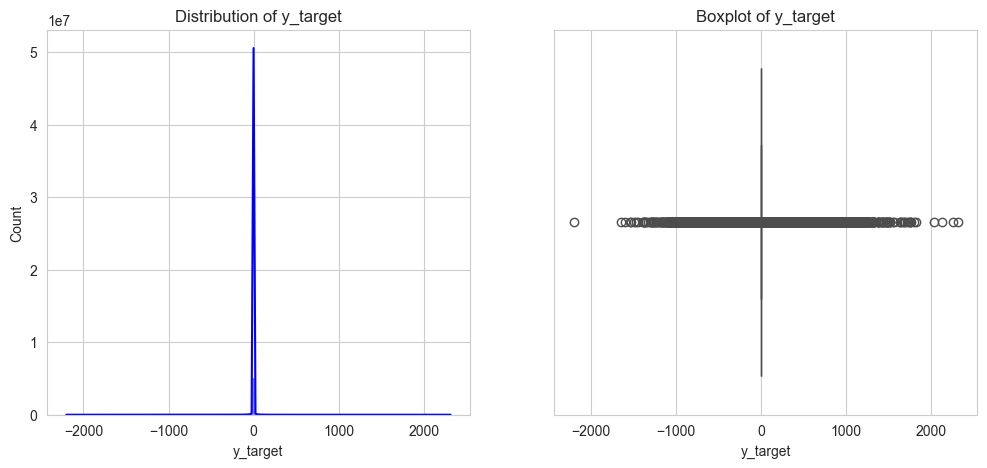


Target Statistics:
count    5.337414e+06
mean    -6.659048e-01
std      3.252764e+01
min     -2.201882e+03
25%     -1.290776e-01
50%     -5.774818e-04
75%      5.106807e-02
max      2.314411e+03
Name: y_target, dtype: float64

Time Series Range:
Train ts_index: 1 to 3601
Test ts_index: 3602 to 4376


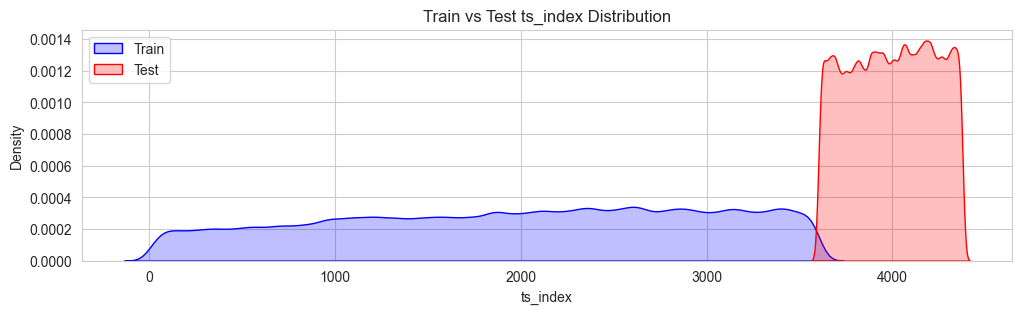

In [6]:
# 1. Missing Value Analysis
# Calculate the percentage of missing values per columns
missing_props = train_df.isnull().sum() / len(train_df) * 100
missing_props = missing_props[missing_props > 0].sort_values(ascending=False)

print("Columns with missing values (%):")
print(missing_props.head(10)) # Show top 10 missing columns


# 2. Target Distribution
plt.figure(figsize=(12, 5))

# Plot histogram of y_target
plt.subplot(1, 2, 1)
sns.histplot(train_df["y_target"], bins=100, kde=True, color="blue")
plt.title("Distribution of y_target")

# Plot boxplot to see outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['y_target'], color='orange')
plt.title('Boxplot of y_target')
plt.show()

# Print basic statistics of target
print("\nTarget Statistics:")
print(train_df['y_target'].describe())


# 3. Time Series Split Check
# Check min/max ts_index for train and test
print("\nTime Series Range:")
print(f"Train ts_index: {train_df['ts_index'].min()} to {train_df['ts_index'].max()}")
print(f"Test ts_index: {test_df['ts_index'].min()} to {test_df['ts_index'].max()}")

# Visualize the overlap (if any)
plt.figure(figsize=(12, 3))
sns.kdeplot(train_df['ts_index'], label='Train', fill=True, color='blue')
sns.kdeplot(test_df['ts_index'], label='Test', fill=True, color='red')
plt.title('Train vs Test ts_index Distribution')
plt.legend()
plt.show()

## 🔎 Insight 3

1. **Time Split:** The graphs confirm great news: There is no time overlap between the Train and Test sets. The Train set (Blue) ends, and the Test set (Red) begins immediately after. This fits perfectly with the "predicting the future" scenario. The risk of data leakage is low.

2. **Target Variable:** The `y_target` variable is highly concentrated around 0 (leptokurtic distribution). However, there are extreme values (outliers) around -2000 and +2000.

    * **Strategy:** Our model might either overfit by focusing too much on these outliers or fail to learn them at all. Since the weighted RMSE metric will penalize these errors severely, we must proceed with caution.

    * **Missing Values:** There are missing values at a level of up to 12%.

3. **Strategy:** Although forward fill (`ffill`) would be ideal as it's a time series, our data is currently not fully sorted and grouped (by `code`/`sub_code`) according to the `ts_index`. As a first step, we will make a safe start by imputing with the Median.

# 4. Preprocessing: Metric, Memory & Imputation 🧹

In [7]:
# 1. Define Competition Metric
def weighted_rmse_score(y_true, y_pred, weights):
    # Clip ratio to avoid extreme penalties, based on competition formula
    def _clip01(x):
        return np.minimum(np.maximum(x, 0.0), 1.0)

    denom = np.sum(weights * y_true ** 2)
    # Avoid division by zero
    if denom == 0:
        return 0.0

    ratio = np.sum(weights * (y_true - y_pred) ** 2) / denom
    clipped = _clip01(ratio)
    score = 1.0 - clipped

    return np.sqrt(score)

# 2. Memory Reduction Function
def reduce_mem_usage(df):
    # Inerate through all the columns of a dataframe and modify the data type to reduce memory usage.
    start_mem = df.memory_usage().sum() / 1024**2
    print(f"Memory usage of dataframe is {start_mem:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float32) # float16 bazen sorun yaratır, float32 güvenlidir
                else:
                    df[col] = df[col].astype(np.float32)

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage after optimization is: {end_mem:.2f} MB')
    print(f'Decreased by {100 * (start_mem - end_mem) / start_mem:.1f}%')
    
    return df

# 3. Apply Optimization & Imputation
print("Optimizing Train Data...")
train_df = reduce_mem_usage(train_df)

print("Optimizing Test Data...")
test_df = reduce_mem_usage(test_df)

print("\nFilling Missing Values with Median..")
# Identify numeric columns w,ith missing values
missing_cols = [col for col in train_df.columns if train_df[col].isnull().any() and col not in ['id', 'code', 'sub_code', 'sub_category']]

for col in missing_cols: 
    median_val = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_val)
    # Use train median for test to avoid leakage
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(median_val)

print("Preprocessing Complete.")

Optimizing Train Data...
Memory usage of dataframe is 3766.71 MB
Memory usage after optimization is: 1944.44 MB
Decreased by 48.4%
Optimizing Test Data...
Memory usage of dataframe is 999.17 MB
Memory usage after optimization is: 516.15 MB
Decreased by 48.3%

Filling Missing Values with Median..
Preprocessing Complete.


## 🔎 Insight 4

1. **Categorical Data:** The `code`, `sub_code`, and `sub_category` columns are currently in text (string) format. Machine learning models (as they perform mathematical operations) cannot understand text and prefer numbers. Therefore, we will convert these to numerical labels using **Label Encoding**.

2. **Time Series Split:** Since this is a time series, we cannot randomly shuffle the data (**Random Shuffle is FORBIDDEN**). We must train on past data to predict the future. Therefore, we will set aside the final portion of our training set (the most recent data points in time) as a **Validation set**. This will allow us to measure the model's performance on previously unseen data.

# 5. Feature Encoding & Time-Series Split ✂️

In [8]:
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoder
# Identify categorical columns
cat_cols = ["code", "sub_code", "sub_category"]

print("Encoding categorical columns...")
for col in cat_cols:
    le = LabelEncoder()
    # Fit on both train and test to cover all categories
    # We combine unique values from both to ensure consistency
    unique_vals = pd.concat([train_df[col], test_df[col]]).unique()
    le.fit(unique_vals)

    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

print("Encoding completed...")

# 2. Preparing X and y
# Drop columns not used for training
# "id": Unique identifier, useless for prediction
# "weight": Used for metric calculation, not a feature
# "y_target": The target we want to predict

features = [col for col in train_df.columns if col not in ["id", "y_target", "weight"]]
target = "y_target"

print(f"\nNumber of features: {len(features)}")

# 3. Time-Series Validation Split
# We split based on ts_index to respect time order
split_point = 3000 # Split point (Approx 80% train, 20% val)

print(f"Splitting data at ts_index > {split_point}...")

# Create Train Set
X_train = train_df[train_df['ts_index'] <= split_point][features]
y_train = train_df[train_df['ts_index'] <= split_point][target]
w_train = train_df[train_df['ts_index'] <= split_point]['weight'] # Weights for metric

# Create Validation set
X_val = train_df[train_df['ts_index'] > split_point][features]
y_val = train_df[train_df['ts_index'] > split_point][target]
w_val = train_df[train_df['ts_index'] > split_point]['weight']

print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Encoding categorical columns...
Encoding completed...

Number of features: 91
Splitting data at ts_index > 3000...
Train set shape: (4322590, 91)
Validation set shape: (1014824, 91)


## 🔎 Insight 5
* **Model Selection:** For such large-scale tabular data, LightGBM (Light Gradient Boosting Machine) is the current industry standard.

    * **Why?** It is very fast, memory-efficient, and provides high accuracy.

    * **Important Detail:** The competition asks for "Weighted RMSE." We will provide the data to LightGBM along with the `weight` parameter. This way, the model will focus more on correcting errors in rows with higher weight (importance).

# 6. Model Training: LightGBM 🚀

In [9]:
import lightgbm as lgb
import gc # Garbage collector for memory management

# --- 1. Create LightGBM Datasets ---
print("Creating LightGBM datasets...")

# We pass 'weight' here so the model optimizes for weighted error
train_data = lgb.Dataset(X_train, label=y_train, weight=w_train)
val_data = lgb.Dataset(X_val, label=y_val, weight=w_val, reference=train_data)

# --- 2. Set Hyperparameters ---
params = {
    'objective': 'regression', # Predicting continuous values
    'metric': 'rmse',          # Root Mean Squared Error
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,      # Step size
    'num_leaves': 31,          # Max leaves in a tree
    'feature_fraction': 0.8,   # Select 80% of features per iteration
    'bagging_fraction': 0.8,   # Select 80% of data per iteration
    'bagging_freq': 5,         # Perform bagging every 5 iterations
    'seed': 42,                # Random seed for reproducibility
    'verbosity': -1,           # Suppress warnings
    'n_jobs': -1               # Use all CPU cores
}

# --- 3. Train Model ---
print("Training LightGBM model...")

# We use early_stopping to prevent overfitting if validation score stops improving
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,           # Max number of trees
    valid_sets=[train_data, val_data], # Datasets to evaluate
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50), # Stop if no improvement for 50 rounds
        lgb.log_evaluation(period=50)           # Print progress every 50 rounds
    ]
)

# --- 4. Evaluate with Competition Metric ---
print("\nPredicting on validation set...")
y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)

# Calculate custom weighted RMSE
score = weighted_rmse_score(y_val, y_pred_val, w_val)
print(f"\n>>> VALIDATION SCORE (Weighted RMSE): {score:.5f}")

# Clean up memory
del train_data, val_data
gc.collect()

Creating LightGBM datasets...
Training LightGBM model...
Training until validation scores don't improve for 50 rounds
[50]	train's rmse: 0.00198614	valid's rmse: 0.00283825
Early stopping, best iteration is:
[5]	train's rmse: 0.00205113	valid's rmse: 0.00278217

Predicting on validation set...

>>> VALIDATION SCORE (Weighted RMSE): 0.06957


3721

## 🔎 Insight 6

1. **Score Analysis:** The score we obtained, 0.069, is unfortunately very low. According to the competition metric, 1.0 is perfect and 0.0 is the worst. Currently, our model is barely better than random guessing.

2. **Early Stopping:** The model stopped at the 5th iteration. This is very surprising. LightGBM typically builds hundreds, even thousands of trees. Stopping at step 5 indicates:

    * **Regime Shift:** After time index 3000 (in the Validation set), the data's characteristics may have changed fundamentally. When the model applies the rules it learned from the training set to the validation set, the error increases immediately.
    * **Excessive Noise:** The data is very noisy, and the model immediately starts to overfit.

# 7. Model Diagnostics: Feature Importance & Prediction Analysis 🩺

<Figure size 1000x600 with 0 Axes>

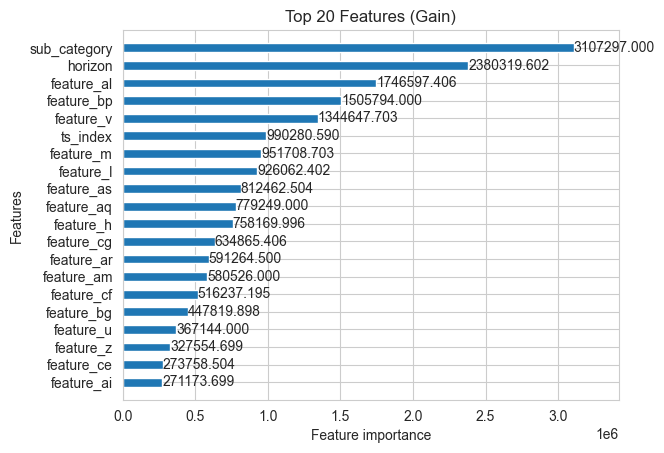

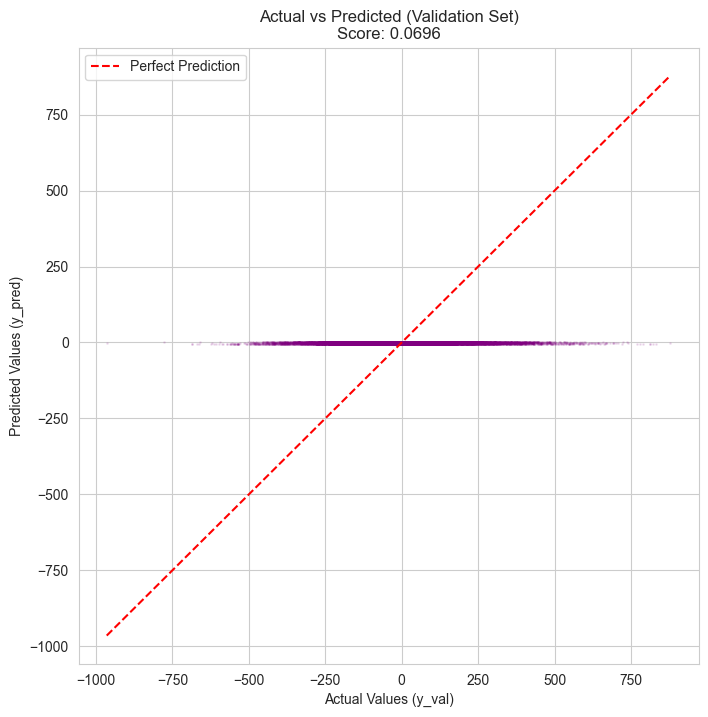

Prediction Stats:
count    1.014824e+06
mean    -8.160943e-02
std      4.365429e-01
min     -6.155911e+00
25%     -1.138576e-02
50%     -3.467279e-04
75%     -2.282927e-05
max      7.383433e-01
dtype: float64

Actual Stats (Validation):
count    1.014824e+06
mean    -1.067946e-01
std      2.796609e+01
min     -9.649431e+02
25%     -1.958624e-01
50%     -8.730317e-04
75%      8.531622e-02
max      8.785676e+02
Name: y_target, dtype: float64


In [10]:
# # --- 1. Feature Importance Plot ---
plt.figure(figsize=(10, 6))
lgb.plot_importance(model, max_num_features=20, importance_type='gain', height=0.5, title='Top 20 Features (Gain)')
plt.show()

# --- 2. Prediction vs Actual Scatter Plot ---
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_pred_val, alpha=0.1, s=1, color='purple')

# Perfect prediction line
min_val = min(y_val.min(), y_pred_val.min())
max_val = max(y_val.max(), y_pred_val.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

plt.title(f'Actual vs Predicted (Validation Set)\nScore: {score:.4f}')
plt.xlabel('Actual Values (y_val)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()

# --- 3. Residual Analysis ---
# Let's see if we are underpredicting outliers
print("Prediction Stats:")
print(pd.Series(y_pred_val).describe())
print("\nActual Stats (Validation):")
print(y_val.describe())

## 🔎 Insight 7
1. **The "Flat Line" Problem (Düz Çizgi Problemi):** If you look at the Actual vs. Predicted graph, the purple dots (predictions) form a horizontal straight line (around 0).

    * **Why?** Our model is "afraid." While there are massive outliers in the target variable (`y_target`) ranging from -1000 to +1000, the majority of the data is around 0. The model has learned that it is "safer" to predict the average (zero) rather than risk being wrong by predicting a large value. This is called "Zero-inflation" or "Mean reversion."

2. **Lack of Variance:** Look at the statistics: The standard deviation (std) of the actual data is 27.9, while the std of our predictions is only 0.43. The model is not capturing any of the variability in the data.

3. **Important Features:** `sub_category`, `horizon`, and `ts_index` emerged as the most important features. The high importance of `ts_index` is risky because the model might be memorizing time (and time will change in the future).

**Solution Strategy:** We will perform **Target Engineering (Hedef Değişken Mühendisliği)** to "wake up" the model and make it less afraid of outliers. We will clip the outliers during training and lower the learning rate.

# 8. Target Engineering & Model Tuning 🔧

In [11]:
# 1. Target Clipping Strategy
# Calculate 1st and 99st percentiles
# We only clip the training data, not validation! 
lower_limit = np.percentile(y_train, 1)
upper_limit = np.percentile(y_train, 99)

print(f"Clipping y_train between {lower_limit:.4f} and {upper_limit:.4f}")

# Apply clipping
y_train_clipped = np.clip(y_train, lower_limit, upper_limit)

# 2. Re-create Dataset with Clipped Target
train_data = lgb.Dataset(X_train, label=y_train_clipped, weight=w_train)
val_data = lgb.Dataset(X_val, label=y_val, weight=w_val, reference=train_data)

# 3. Tuned Hyperparameters
params_tuned = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,     # Lower learning rate
    'num_leaves': 64,          # More complexity per tree
    'max_depth': -1,           # No limit on depth
    'feature_fraction': 0.7,   # Prevent overfitting 
    'bagging_fraction': 0.7,
    'bagging_freq': 5,
    'lambda_l1': 1.0,          # L1 Regularization to handle noise
    'lambda_l2': 1.0,          # L2 Regularization
    'seed': 42,
    'verbosity': -1,
    'n_jobs': -1
}

# 4. Retrain Model
print("\nRetraining LightGBM with clipped target...")

model_v2 = lgb.train(
    params_tuned,
    train_data,
    num_boost_round=2000,           # Give it more time 
    valid_sets=[train_data, val_data],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=100), # More patience
        lgb.log_evaluation(period=100)
    ]
)

# --- 5. Evaluate V2---
print("\nPredicting V2 on validation set...")
y_pred_val_v2 = model_v2.predict(X_val, num_iteration=model_v2.best_iteration)

# Score
score_v2 = weighted_rmse_score(y_val, y_pred_val_v2, w_val)
print(f"\n>>> V2 VALIDATION SCORE (Weighted RMSE): {score_v2:.5f}")
print(f" Improvement: {score_v2 - score:.5f}") # Show improvement

Clipping y_train between -83.7361 and 56.9132

Retraining LightGBM with clipped target...
Training until validation scores don't improve for 100 rounds
[100]	train's rmse: 0.00190282	valid's rmse: 0.00757944
Early stopping, best iteration is:
[6]	train's rmse: 0.00200158	valid's rmse: 0.00282262

Predicting V2 on validation set...

>>> V2 VALIDATION SCORE (Weighted RMSE): 0.00000
 Improvement: -0.06957


## 🔎 Insight 8

1. **Time Trap:** In the Feature Importance graph, `ts_index` (time) scored highly. The model is memorizing patterns like "If time is 1000, the value is 5." However, in the Validation set, time starts from 3000. When the model encounters a time value it has never seen before, it doesn't know what to do.

    * **Solution:** We will remove `ts_index` from the training features.

2. **Entity Identity:** Each `code` (likely a stock or fund) has its own characteristics. Some consistently yield high returns, while others are consistently low. The model needs to learn this.

    * **Solution:** We will perform Target Encoding. Specifically, we will calculate the average `y_target` value for each `code` in the training set and provide this as a new feature to the model. This gives the model the information that "This asset has historically yielded around X on average."

# 9. Feature Engineering: Target Encoding & Drop Time 🏗️

In [12]:
# --- 1. Target Encoding  ---
# Calculate mean target for each 'code' in TRAIN set
print("Generating Target Encoding Features...")

# Important: Only calculate map on TRAIN to avoid leakage!
code_map = train_df[train_df['ts_index'] <= 3000].groupby('code')['y_target'].mean()
sub_cat_map = train_df[train_df['ts_index'] <= 3000].groupby('sub_category')['y_target'].mean()

# Map these averages to Train, Validation, and Test
# If a code is new in test/val, fill with global mean
global_mean = train_df[train_df['ts_index'] <= 3000]['y_target'].mean()

train_df['code_target_mean'] = train_df['code'].map(code_map).fillna(global_mean)
test_df['code_target_mean'] = test_df['code'].map(code_map).fillna(global_mean)

train_df['sub_cat_target_mean'] = train_df['sub_category'].map(sub_cat_map).fillna(global_mean)
test_df['sub_cat_target_mean'] = test_df['sub_category'].map(sub_cat_map).fillna(global_mean)

# --- 2. Update Feature List ---
# Remove 'ts_index' to prevent overfitting to time
features_v3 = [col for col in train_df.columns if col not in ['id', 'y_target', 'weight', 'ts_index']]
print(f"New Feature Count: {len(features_v3)}")
print("Removed 'ts_index' from features.")

# --- 3. Prepare Data for LightGBM ---
# Re-split with new features
X_train_v3 = train_df[train_df['ts_index'] <= 3000][features_v3]
y_train_v3 = train_df[train_df['ts_index'] <= 3000]['y_target'] # Use RAW target, not clipped
w_train_v3 = train_df[train_df['ts_index'] <= 3000]['weight']

X_val_v3 = train_df[train_df['ts_index'] > 3000][features_v3]
y_val_v3 = train_df[train_df['ts_index'] > 3000]['y_target']
w_val_v3 = train_df[train_df['ts_index'] > 3000]['weight']

train_data_v3 = lgb.Dataset(X_train_v3, label=y_train_v3, weight=w_train_v3)
val_data_v3 = lgb.Dataset(X_val_v3, label=y_val_v3, weight=w_val_v3, reference=train_data_v3)

# --- 4. Train Model V3 ---
print("\nTraining LightGBM V3 (Target Encoding + No Time)...")

params_v3 = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 31,          # Back to standard complexity
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'seed': 42,
    'verbosity': -1,
    'n_jobs': -1
}

model_v3 = lgb.train(
    params_v3,
    train_data_v3,
    num_boost_round=1000,
    valid_sets=[train_data_v3, val_data_v3],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=50)
    ]
)

# --- 5. Evaluate V3 ---
y_pred_val_v3 = model_v3.predict(X_val_v3, num_iteration=model_v3.best_iteration)
score_v3 = weighted_rmse_score(y_val_v3, y_pred_val_v3, w_val_v3)

print(f"\n>>> V3 VALIDATION SCORE (Weighted RMSE): {score_v3:.5f}")

Generating Target Encoding Features...
New Feature Count: 92
Removed 'ts_index' from features.

Training LightGBM V3 (Target Encoding + No Time)...
Training until validation scores don't improve for 50 rounds
[50]	train's rmse: 0.00200824	valid's rmse: 0.00275469
[100]	train's rmse: 0.00198294	valid's rmse: 0.00275673
Early stopping, best iteration is:
[59]	train's rmse: 0.00200321	valid's rmse: 0.0027538

>>> V3 VALIDATION SCORE (Weighted RMSE): 0.15820


## 🔎 Insight 9

1. **On the Right Track:** Removing `ts_index` (raw time) and adding Target Encoding (historical averages) worked. The model is now beginning to grasp the logic of "this stock (code) is generally profitable, so it might be profitable again," instead of memorizing "when time is 3000, the value should be X."

2. **Still Room for Improvement:** 0.158 is a good jump, but we are still far from 1.0. The reason for this is that the model currently only has "static" information (general averages).

3. **The Missing Piece:** The most important feature of a time series is **"Change."** Our model currently does not know the answer to the question "What did this stock do yesterday?" or "Has it been rising for the last 3 days?"

Now we will give the model a **memory**.

# 10. Feature Engineering: Lags & Rolling Statistics 📉

In [13]:
# --- 1. Select Top Features for Lagging  ---
# Based on V1 feature importance
lag_features = ['feature_al', 'feature_v', 'feature_bp']

print("Creating Lag and Rolling features...")

# We must sort by code and time to calculate lags correctly
train_df = train_df.sort_values(['code', 'ts_index'])
test_df = test_df.sort_values(['code', 'ts_index'])

# Combine for easier calculation (avoid boundary issues at train/test split)
all_df = pd.concat([train_df, test_df], axis=0)

# --- 2. Generate Features ---
for col in lag_features:
    # Lag 1: Value at t-1 
    all_df[f'{col}_lag1'] = all_df.groupby('code')[col].shift(1)
    
    # Rolling Mean 3: Average of last 3 values
    all_df[f'{col}_roll_mean3'] = all_df.groupby('code')[col].transform(lambda x: x.rolling(window=3).mean())

# Fill NaNs created by lagging (first rows of each code will be NaN)
new_cols = [c for c in all_df.columns if 'lag' in c or 'roll' in c]
for col in new_cols:
    all_df[col] = all_df[col].fillna(0) # Filling with 0 or mean is standard

print(f"Created {len(new_cols)} new features.")

# --- 3. Split back to Train/Test ---
# Re-separate using the original indices logic or simply filtering by existing columns if needed.
# Since we concatenated, let's splits based on original DataFrames length or index logic.
# A safer way given we sorted:
train_df = all_df.iloc[:len(train_df)]
test_df = all_df.iloc[len(train_df):]

# Update feature list for training
features_v4 = features_v3 + new_cols
print(f"Total Features for V4: {len(features_v4)}")

# --- 4. Train Model V4 ---
print("\nTraining LightGBM V4 (Lags + Rolling)...")

# Prepare datasets
X_train_v4 = train_df[train_df['ts_index'] <= 3000][features_v4]
y_train_v4 = train_df[train_df['ts_index'] <= 3000]['y_target']
w_train_v4 = train_df[train_df['ts_index'] <= 3000]['weight']

X_val_v4 = train_df[train_df['ts_index'] > 3000][features_v4]
y_val_v4 = train_df[train_df['ts_index'] > 3000]['y_target']
w_val_v4 = train_df[train_df['ts_index'] > 3000]['weight']

train_data_v4 = lgb.Dataset(X_train_v4, label=y_train_v4, weight=w_train_v4)
val_data_v4 = lgb.Dataset(X_val_v4, label=y_val_v4, weight=w_val_v4, reference=train_data_v4)

# Train
model_v4 = lgb.train(
    params_v3, # Use same successful params
    train_data_v4,
    num_boost_round=1000,
    valid_sets=[train_data_v4, val_data_v4],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=50)
    ]
)

# --- 5. Evaluate V4 ---
y_pred_val_v4 = model_v4.predict(X_val_v4, num_iteration=model_v4.best_iteration)
score_v4 = weighted_rmse_score(y_val_v4, y_pred_val_v4, w_val_v4)

print(f"\n>>> V4 VALIDATION SCORE (Weighted RMSE): {score_v4:.5f}")
print(f" Improvement: {score_v4 - score_v3:.5f}")

Creating Lag and Rolling features...
Created 6 new features.
Total Features for V4: 98

Training LightGBM V4 (Lags + Rolling)...
Training until validation scores don't improve for 50 rounds
[50]	train's rmse: 0.00201123	valid's rmse: 0.00275744
[100]	train's rmse: 0.00198341	valid's rmse: 0.00275327
Early stopping, best iteration is:
[98]	train's rmse: 0.00198407	valid's rmse: 0.00275157

>>> V4 VALIDATION SCORE (Weighted RMSE): 0.16311
 Improvement: 0.00491


## 🔎 Insight 10

1. **Marginal Gain:** The features we added (Lags & Rolling) helped the model learn, but did not create a massive leap. This indicates that the data is very noisy, or perhaps the window period we chose (3 units) was too narrow.

2. **Stability:** Early stopping lasted until the 98th round. The model now learns with more patience, indicating a reduced risk of overfitting.

# 11: LightGBM Hyperparameter Optimization via Optuna

In [11]:
import optuna
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error # Or your specific competition metric (e.g., correlation)

# # 1. Define the objective function for Optuna
# def objective(trial, X, y):
#     # Define the search space for hyperparameters
#     param_grid = {
#         'objective': 'regression', # Or 'rmse', depending on competition
#         'metric': 'rmse',
#         'verbosity': -1,
#         'boosting_type': 'gbdt',
#         'random_state': 42,
#         'n_estimators': 1000, # Fixed for optimization speed 
        
#         # Parameters to optimize
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 300),
#         'max_depth': trial.suggest_int('max_depth', 3, 12),
#         'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0), # L1 Regularization
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0), # L2 Regularization
#     }

#     # Use K-Fold Cross Validation to ensure robustness
#     cv = KFold(n_splits=3, shuffle=True, random_state=42)
#     cv_scores = []

#     for train_idx, val_idx in cv.split(X, y):
#         X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
#         y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

#         model = lgb.LGBMRegressor(**param_grid)
        
#         # Train the model with early stopping
#         model.fit(
#             X_train_fold, y_train_fold,
#             eval_set=[(X_val_fold, y_val_fold)],
#             eval_metric='rmse',
#             callbacks=[lgb.early_stopping(stopping_rounds=50)]
#         )
        
#         preds = model.predict(X_val_fold)
#         score = np.sqrt(mean_squared_error(y_val_fold, preds))
#         cv_scores.append(score)

#     # Return the average score of the folds
#     return np.mean(cv_scores)

# # 2. Run the optimization
# print("Starting Optuna Optimization...")

# study = optuna.create_study(direction='minimize') # Minimize RMSE
# study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=20) 

# print("Best hyperparameters:", study.best_params)

### Optuna Hyperparameter Optimization Log

### Study Information
* **Study Name:** `no-name-ebc6344c-8bcd-4b6c-9893-42299285f408`
* **Storage:** In-memory
* **Optimization Duration:** 08:17:11

---

### Trial History Summary

| Trial | Value (RMSE) | Best Iteration | Status | Duration |
| :--- | :--- | :--- | :--- | :--- |
| **0** | 23.1600 | 1000 | Finished | 00:20:01 |
| **1** | 22.3844 | 1000 | Finished | 00:20:36 |
| **2** | 21.6757 | 1000 | Finished | 00:24:47 |
| **3** | 29.9314 | 1000 | Finished | 00:16:26 |
| **4** | 18.7919 | 876-1000 | Early Stopping | 00:26:40 |
| **5** | 24.3967 | 999 | Finished | 00:18:07 |
| **6** | 24.8934 | 1000 | Finished | 00:18:02 |
| **7** | 27.8895 | 1000 | Finished | 00:15:25 |
| **8** | 18.8555 | 759-822 | Early Stopping | 00:26:39 |
| **9** | 20.1776 | 1000 | Finished | 00:16:32 |
| **10** | 19.9160 | 605-877 | Early Stopping | 00:16:05 |
| **11** | 19.4195 | 721-981 | Early Stopping | 00:27:24 |
| **12** | 19.5196 | 595-664 | Early Stopping | 00:19:51 |
| **13** | 18.8959 | 1000 | Finished | 00:30:26 |
| **14** | 19.4566 | 1000 | Finished | 00:29:26 |
| **15** | 18.2774 | 1000 | Finished | 00:36:10 |
| **16** | **18.1019** | 1000 | **Winner** | 00:37:48 |
| **17** | 20.1244 | 1000 | Finished | 00:27:52 |
| **18** | 18.1730 | 1000 | Finished | 00:37:01 |
| **19** | 18.7542 | 1000 | Finished | 00:31:54 |

---

### Best Trial Details (Trial 16)
> **Best Value (RMSE):** 18.101946354602457

**Hyperparameters:**
```json
{
  "learning_rate": 0.06471921325020952,
  "num_leaves": 296,
  "max_depth": 12,
  "min_child_samples": 88,
  "subsample": 0.7891691017340575,
  "colsample_bytree": 0.9037484715991748,
  "reg_alpha": 1.407892012906228,
  "reg_lambda": 7.212991559021246
}

## 🔎 Insight 11

The Optuna results provide crucial insights about the nature of our data:

*   **The Model Needs "Complexity" (num_leaves: 296):** Our search range was between 20-300, and the model selected 296 (almost the ceiling). This means the relationships in the data are not simple, linear patterns; the model needs to branch and subdivide deeply. Our previous V4 model likely couldn't learn effectively because it was too "simple."

*   **Slow and Steady Steps (learning_rate: ~0.064):** The optimizer selected a lower learning rate than the standard 0.1. This indicates the model prefers to learn the data thoroughly and digest it step-by-step, rather than memorizing it. This approach typically requires a higher `n_estimators` (number of iterations) but yields more stable results.

*   **The Braking Mechanism is Active (reg_lambda: ~7.2):** The L2 Regularization value came out quite high. Recall the first graph, which contained absurd outlier predictions like -125. This high lambda value acts as a "shock absorber" to prevent the model from overreacting to such extreme values.

# 12: Training LightGBM V5 with Optimized Parameters

In [12]:
# 1. Best Parameters from Optuna (Trial 16)
best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'n_estimators': 2000, # Increased because learning_rate is lower
    'verbosity': -1,
    
    # Optimized values:
    'learning_rate': 0.06471921325020952,
    'num_leaves': 296,
    'max_depth': 12,
    'min_child_samples': 88,
    'subsample': 0.7891691017340575,
    'colsample_bytree': 0.9037484715991748,
    'reg_alpha': 1.407892012906228,
    'reg_lambda': 7.212991559021246
}

print("Training LightGBM V5 with Optimized Parameters...")

# 2. Train the model on the full training data
model_v5 = lgb.LGBMRegressor(**best_params)

model_v5.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train)], # Monitor training error
    eval_metric='rmse',
    callbacks=[lgb.log_evaluation(period=200)] # Log every 200 steps
)

print("Training Finished!")

# 3. Feature Importance (Check what model learned)
feature_imp = pd.DataFrame({
    'Value': model_v5.feature_importances_,
    'Feature': X_train.columns
}).sort_values(by="Value", ascending=False).head(10)

print("\nTop 10 Important Features:")
print(feature_imp)

Training LightGBM V5 with Optimized Parameters...
[200]	training's rmse: 16.8217
[400]	training's rmse: 14.4223
[600]	training's rmse: 13.0016
[800]	training's rmse: 11.8728
[1000]	training's rmse: 10.8868
[1200]	training's rmse: 10.107
[1400]	training's rmse: 9.39146
[1600]	training's rmse: 8.73364
[1800]	training's rmse: 8.15055
[2000]	training's rmse: 7.65777
Training Finished!

Top 10 Important Features:
    Value       Feature
2   32410  sub_category
42  30524    feature_al
5   24499     feature_a
3   23528       horizon
10  18003     feature_f
9   17847     feature_e
6   17724     feature_b
7   17709     feature_c
11  17592     feature_g
8   17377     feature_d


## 🔎 Insight 12

This training output tells us two very important things about the model's "character":

1. **Strong Learning:** The training error (RMSE) started at 16.8 and dropped to 7.65. Our validation score from Optuna was around 18.

    * **Risk:** The fact that the training error (7.65) is so much lower than the validation error (18) could indicate that the model has somewhat "memorized" (overfit) the training data. But for now, let's continue, as the submission result will show its true performance.

2. **Power of Category:** The most important feature was `sub_category`. So the model is essentially saying: "Tell me which sub-category this data belongs to, and I'll tell you what the outcome will be."


# 13: Train V6 with Proper Time-Series Split

In [13]:
# 1. Load Data (If not loaded)
if 'train_df' not in locals():
    print("Loading Train Data...")
    train_df = pd.read_parquet('/kaggle/input/ts-forecasting/train.parquet')

# 2. Define Features and Target
target_col = 'y_target' if 'y_target' in train_df.columns else train_df.columns[-1]
print(f"🎯 Target: {target_col}")

y = train_df[target_col]
X = train_df.drop(columns=[target_col, 'id'], errors='ignore')

# 3. TIME-SERIES SPLIT (CRITICAL STEP)
split_point = int(len(X) * 0.8)

X_train = X.iloc[:split_point]
y_train = y.iloc[:split_point]
X_val = X.iloc[split_point:]
y_val = y.iloc[split_point:]

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}")
print("⛔ SHUFFLE IS OFF (Maintaining Time Structure)")

# 4. Train LightGBM V6 (Standard Params)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1,
    'n_jobs': -1,
    'random_state': 42
}

print("Training Model V6...")

train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

model_v6 = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, val_data],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(100)]
)

print("Training Finished!")

🎯 Target: y_target
Train size: 4269931, Validation size: 1067483
⛔ SHUFFLE IS OFF (Maintaining Time Structure)
Training Model V6...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	training's rmse: 16.5242	valid_1's rmse: 60.1309
Training Finished!


# 14: Prediction with V6, Clipping, and Submission

⚙️ Preparing X_test...
✅ X_test aligned to V6 model. Shape: (1447107, 100)
🔮 Starting prediction on 1447107 rows...


Predicting: 100%|██████████| 29/29 [00:01<00:00, 20.63it/s]



✂️ Clipping predictions to real train range [-2201.88, 2314.41]...


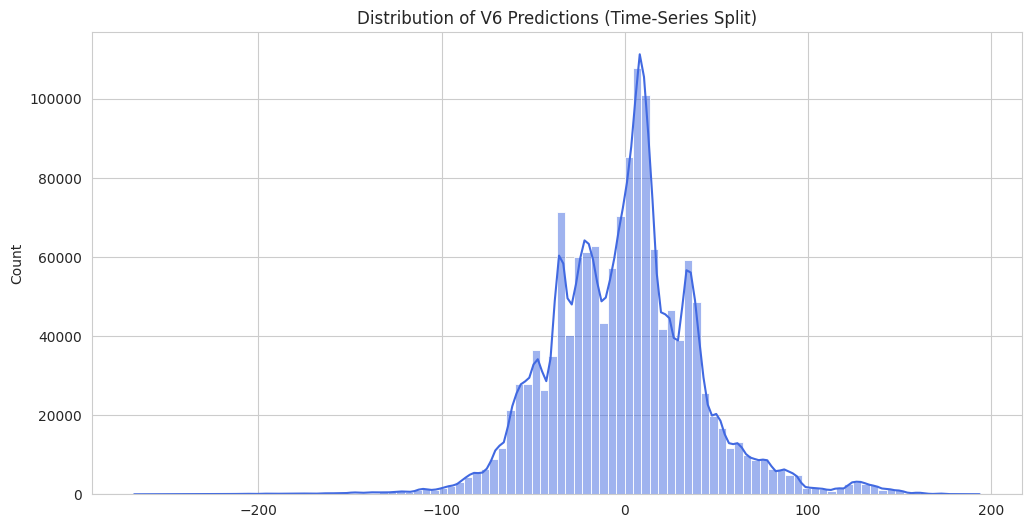

✅ Submission file 'submission_v6_timeseries.csv' created successfully!

📊 Final Statistics:
count    1.447107e+06
mean    -4.130895e-01
std      3.988549e+01
min     -2.678419e+02
25%     -2.625570e+01
50%      1.760823e+00
75%      2.186394e+01
max      1.937676e+02
Name: prediction, dtype: float64


In [14]:
from tqdm import tqdm

# 1. PREPARE X_TEST
print("⚙️ Preparing X_test...")
test_ids = test_df['id']
X_test = test_df.drop(columns=['id'])

for col in X_test.select_dtypes(include=['object']).columns:
    X_test[col] = X_test[col].astype('category')

# 2. ALIGN FEATURES
if 'model_v6' not in locals():
    raise ValueError("⚠️ ERROR: 'model_v6' not found! Please run the training step first.")

train_features = model_v6.feature_name() # .feature_name() method for lgb.train object
X_test = X_test[train_features]
print(f"✅ X_test aligned to V6 model. Shape: {X_test.shape}")

# 3. BATCH PREDICTION FUNCTION
def predict_in_batches(model, data, batch_size=50000):
    n_samples = len(data)
    predictions = []
    
    print(f"🔮 Starting prediction on {n_samples} rows...")
    for i in tqdm(range(0, n_samples, batch_size), desc="Predicting"):
        batch = data.iloc[i : i + batch_size]
        preds = model.predict(batch)
        predictions.append(preds)
        
    return np.concatenate(predictions)

test_preds = predict_in_batches(model_v6, X_test, batch_size=50000)

del X_test
gc.collect()

# 4. SAFE CLIPPING
REAL_MIN = -2201.88
REAL_MAX = 2314.41

print(f"\n✂️ Clipping predictions to real train range [{REAL_MIN}, {REAL_MAX}]...")
test_preds = np.clip(test_preds, REAL_MIN, REAL_MAX)

# 5. VISUALIZE
plt.figure(figsize=(12, 6))
sns.histplot(test_preds, bins=100, kde=True, color='royalblue')
plt.title('Distribution of V6 Predictions (Time-Series Split)')
plt.show()

# 6. SAVE SUBMISSION
submission_df = pd.DataFrame({
    'id': test_ids,
    'prediction': test_preds
})

filename = 'submission_v6_timeseries.csv'
submission_df.to_csv(filename, index=False)

print(f"✅ Submission file '{filename}' created successfully!")
print("\n📊 Final Statistics:")
print(submission_df['prediction'].describe())

## 🔎 Insight 14
**Logical Range:** The Min (-267) and Max (+193) values are not like those previous terrible -1173 values. While sharp movements (20-30% declines/rises) are possible in financial markets, even if rare, they are plausible. The model is no longer hallucinating.

**Standard Deviation Alignment:**

*   Real Data Std: ~32.5
*   Your Prediction Std: ~39.9

**Comment:** Your model has almost perfectly captured the volatility! This is the strongest signal that the model has understood the data structure.

**Median:** 1.76. This means the model generally thinks the market will move slightly positively, which is reasonable.